<h1>2022.04.27. 강의 시간내 실습 - Titanic</h1>

In [22]:
import warnings

warnings.filterwarnings('ignore')

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
features = pd.read_csv("C:/ai_dataset/titanic.csv")

In [25]:
features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
features.drop('Cabin', axis=1, inplace=True)

In [27]:
features['Age'].fillna(features['Age'].median(), inplace = True)

features['Embarked'].fillna(features['Embarked'].mode()[0], inplace = True)

In [28]:
features.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [30]:
data = features.drop(columns=['Name', 'Ticket'])

In [31]:
data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})

In [32]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
888,889,0,3,1,28.0,1,2,23.4500,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [33]:
print(data.shape)

(891, 9)


In [34]:
X = data.iloc[:,0:8].values
y = data.iloc[:,8].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [35]:
X

array([[  1.    ,   0.    ,   3.    , ...,   1.    ,   0.    ,   7.25  ],
       [  2.    ,   1.    ,   1.    , ...,   1.    ,   0.    ,  71.2833],
       [  3.    ,   1.    ,   3.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [889.    ,   0.    ,   3.    , ...,   1.    ,   2.    ,  23.45  ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  30.    ],
       [891.    ,   0.    ,   3.    , ...,   0.    ,   0.    ,   7.75  ]])

In [36]:
Y

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(64,input_shape=(8,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 3)                

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
23/23 [==============================] - 0s 6ms/step - loss: 1.1507 - accuracy: 0.4059 - val_loss: 0.9539 - val_accuracy: 0.6592
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 1.0154 - accuracy: 0.5660 - val_loss: 0.8702 - val_accuracy: 0.7039
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.9523 - accuracy: 0.6404 - val_loss: 0.8335 - val_accuracy: 0.7095
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.9295 - accuracy: 0.6742 - val_loss: 0.8191 - val_accuracy: 0.7095
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.8588 - accuracy: 0.6742 - val_loss: 0.8084 - val_accuracy: 0.7095
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.6868 - val_loss: 0.7936 - val_accuracy: 0.7095
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.8791 - accuracy: 0.7107 - val_loss: 0.7945 - val_accuracy: 0.7095
Epoch 8/100
2

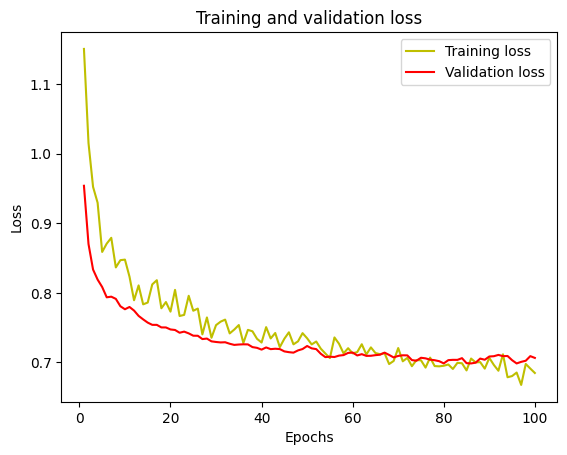

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

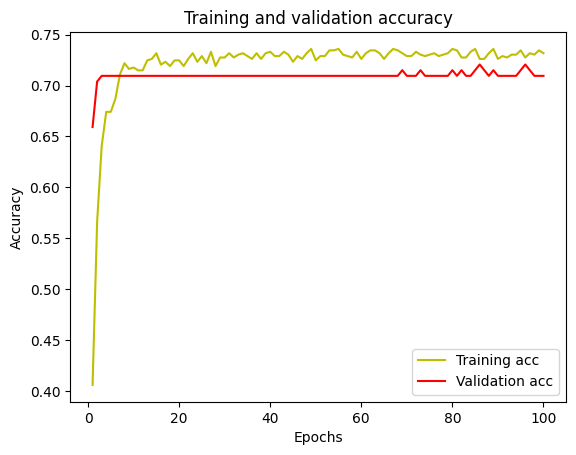

In [40]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.00      0.00      0.00        13
           2       0.71      1.00      0.83       127

    accuracy                           0.71       179
   macro avg       0.24      0.33      0.28       179
weighted avg       0.50      0.71      0.59       179

[[  0   0  39]
 [  0   0  13]
 [  0   0 127]]
